<strong>avant de commencer , on a fait une concaténation de deux classes 'tr_fraudes' et 'tr_normales' , le résultat de la concaténation était 'cleaned_data.csv' , ce dataset commence avec toutes les transactions normales (étiquetées avec 0) jusqu'au milieu, suivi de toutes les transactions frauduleuses (étiquetées avec 1) à partir du milieu jusqu'à la fin .
</strong>
<strong>
dans ce cas ,  on doit élanger les données de manière aléatoire avant de diviser en ensembles d'entraînement et de test. </strong>
<strong>
Cela garantit que les ensembles de données contiennent un mélange représentatif des deux classes et évite que le modèle ne se base uniquement sur l'ordre des transactions pour prendre des décisions.
</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('cleaned_data.csv')


In [3]:
# d'abord nous voulons mélanger le dataset en fonction de la colonne 'isFraud' utilisant sort_values()
# La méthode sort_values() est une fonctionnalité existe sur Pandas.
# Elle est utilisée pour trier un DataFrame ou une série en fonction des valeurs d'une ou plusieurs colonnes.

In [4]:
data_melang = dataset.sort_values(by='isFraud').sample(frac=1, random_state=5)

In [5]:
#faire une copie 
data = data_melang.copy()

In [6]:
data.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
9381,1,11272.74,52250.00,1,0.00,0,0
12196,5,226193.35,1331498.39,0,548993.70,0,0
2799,2,4720554.95,4720554.95,0,0.00,1,0
6094,3,1688761.08,1688761.08,0,0.00,1,0
13118,5,455427.69,14409380.62,0,8565657.72,0,0


In [7]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [8]:
# features
x = data.drop('isFraud',axis=1)

# target
y = data['isFraud']

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [10]:
# les Colonnes à normaliser
cols_a_normaliser = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

# Initialiser le MinMaxScaler et fit_transform seulement les colonnes selectionnées 
scaler = StandardScaler()
X_standard = scaler.fit_transform(x[cols_a_normaliser])
x[cols_a_normaliser] = X_standard

# Normalisation standardScaler :
__________________________________________________________


<img src='imgs/standardScaler.PNG' style ='width:300px;heigth:800px' >  

__________________________________________________________


In [11]:
x.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFlaggedFraud
9381,1,-0.436333,-0.362126,1,-0.215593,0
12196,5,-0.320878,0.028989,0,-0.071211,0
2799,2,2.093484,1.065155,0,-0.215593,0
6094,3,0.464811,0.138218,0,-0.215593,0
13118,5,-0.197733,4.027404,0,2.037126,0


# l'Apprentissage Automatique :

In [12]:
# pip install xgboost


In [13]:
# pip install keras


In [14]:
# pip install tensorflow


Epoch 1/10
411/411 [==============================] - 5s 5ms/step - loss: 0.4614 - accuracy: 0.7619
Epoch 2/10
411/411 [==============================] - 2s 5ms/step - loss: 0.3231 - accuracy: 0.8326
Epoch 3/10
411/411 [==============================] - 2s 5ms/step - loss: 0.3121 - accuracy: 0.8396
Epoch 4/10
411/411 [==============================] - 3s 6ms/step - loss: 0.2888 - accuracy: 0.8513
Epoch 5/10
411/411 [==============================] - 2s 6ms/step - loss: 0.2595 - accuracy: 0.8714
Epoch 6/10
411/411 [==============================] - 2s 6ms/step - loss: 0.2253 - accuracy: 0.8941
Epoch 7/10
411/411 [==============================] - 2s 6ms/step - loss: 0.2005 - accuracy: 0.9100
Epoch 8/10
411/411 [==============================] - 2s 6ms/step - loss: 0.1989 - accuracy: 0.9106
Epoch 9/10
411/411 [==============================] - 2s 5ms/step - loss: 0.1856 - accuracy: 0.9187
Epoch 10/10
103/103 [==============================] - 1s 3ms/step
Modèle : SVM
Exactitude : 0.88
F1

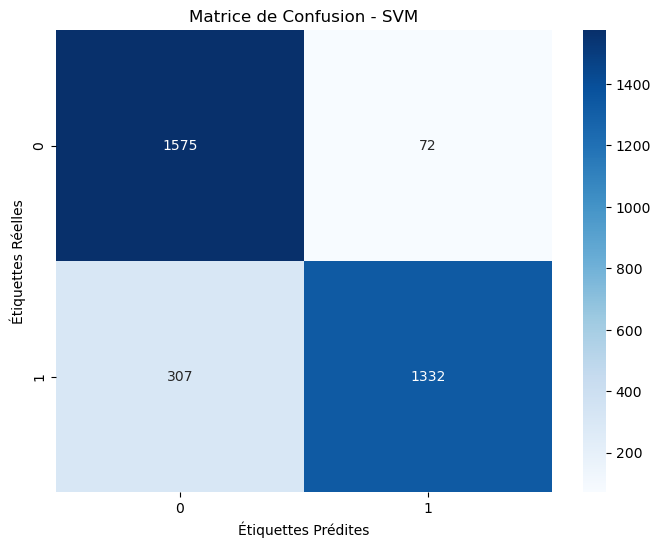

Modèle : Decision Tree
Exactitude : 0.98
F1-Score : 0.98
Précision : 0.98
Matrice de Confusion:
[[1612   35]
 [  20 1619]]


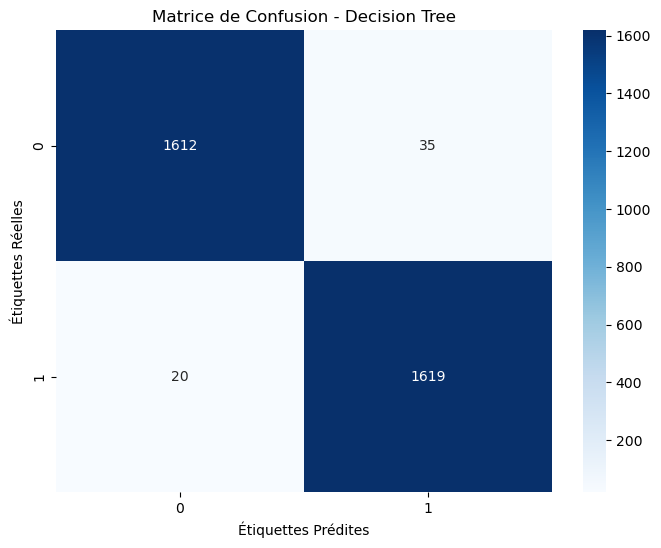

Modèle : Random Forest
Exactitude : 0.99
F1-Score : 0.99
Précision : 0.99
Matrice de Confusion:
[[1608   39]
 [   5 1634]]


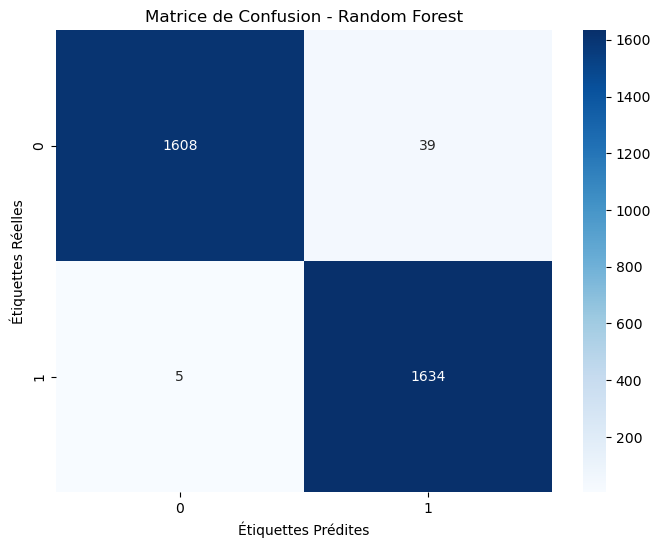

Modèle : KNN
Exactitude : 0.96
F1-Score : 0.96
Précision : 0.96
Matrice de Confusion:
[[1574   73]
 [  47 1592]]


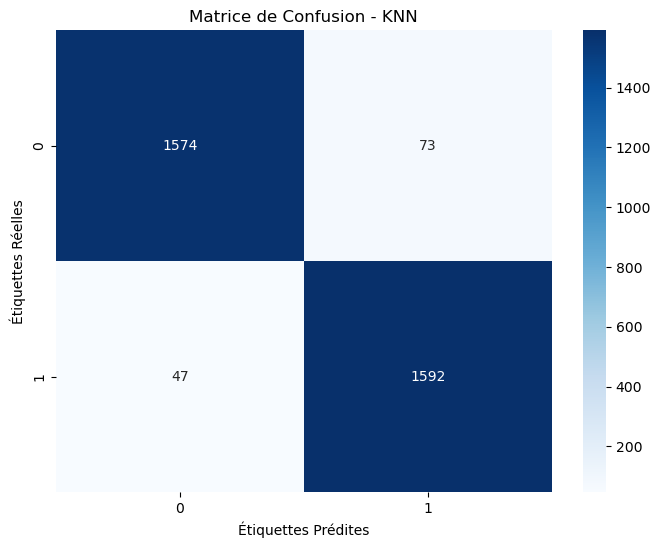

Modèle : Logistic Regression
Exactitude : 0.82
F1-Score : 0.82
Précision : 0.82
Matrice de Confusion:
[[1371  276]
 [ 304 1335]]


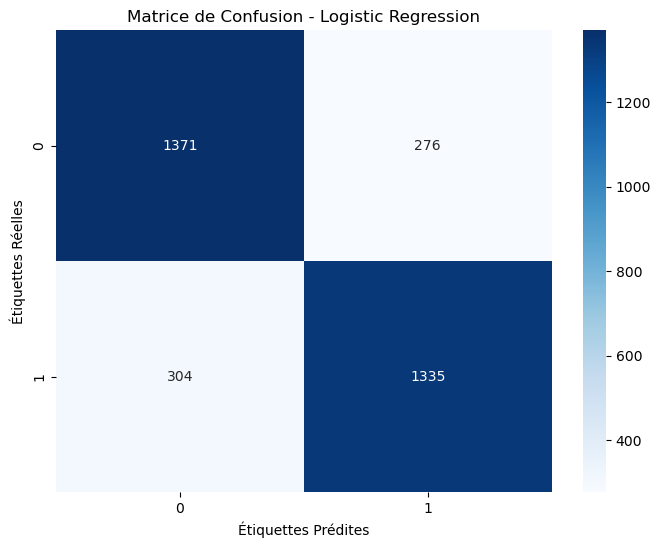

Modèle : XGBoost
Exactitude : 0.99
F1-Score : 0.99
Précision : 0.99
Matrice de Confusion:
[[1619   28]
 [   4 1635]]


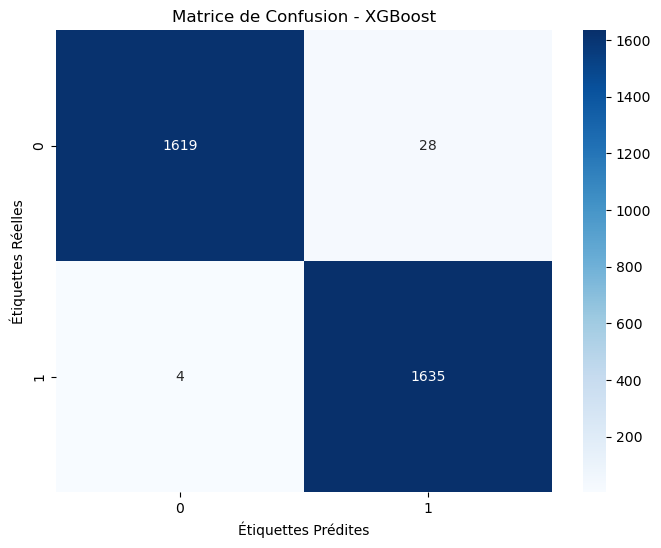

Modèle : LSTM
Exactitude : 0.91
F1-Score : 0.91
Précision : 0.91
Matrice de Confusion:
[[1581   66]
 [ 228 1411]]


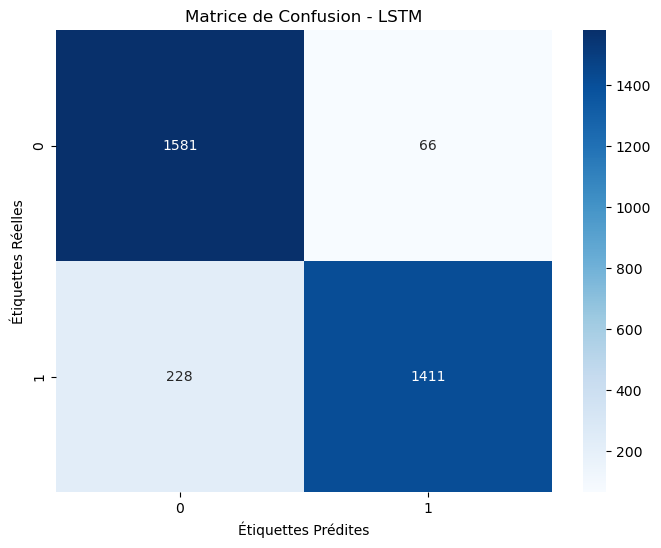

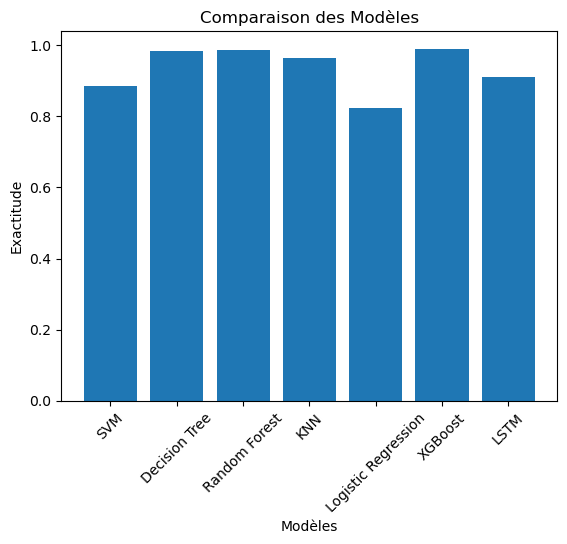

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# ... (chargement de vos données)

# divisier (Split) nos données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Liste des modèles
models = [
    ('SVM', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42))
]

# Entraîner et évaluer chaque modèle
results = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append((name, accuracy, f1, precision, conf_matrix))

# Entraîner et évaluer LSTM séparément
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(x_train.shape[1], 1)),
    Dense(units=1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_train, y_train, epochs=10, batch_size=32)
y_pred_lstm = lstm_model.predict(x_test)
y_pred_lstm_classes = (y_pred_lstm > 0.5).astype(int)  # Arrondir les prédictions
lstm_accuracy = accuracy_score(y_test, y_pred_lstm_classes)
lstm_f1 = f1_score(y_test, y_pred_lstm_classes, average='macro')
lstm_precision = precision_score(y_test, y_pred_lstm_classes, average='macro')
lstm_conf_matrix = confusion_matrix(y_test, y_pred_lstm_classes)
results.append(('LSTM', lstm_accuracy, lstm_f1, lstm_precision, lstm_conf_matrix))

# Afficher les résultats et les matrices de confusion
for name, accuracy, f1, precision, conf_matrix in results:
    print(f"Modèle : {name}")
    print(f"Exactitude : {accuracy:.2f}")
    print(f"F1-Score : {f1:.2f}")
    print(f"Précision : {precision:.2f}")
    print("Matrice de Confusion:")
    print(conf_matrix)
    print("==============================")
    
    # Afficher la matrice de confusion en utilisant Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Étiquettes Prédites')
    plt.ylabel('Étiquettes Réelles')
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()

# ... (créer un diagramme en barres)

noms = [nom for nom, _, _, _, _ in results]
exactitudes = [exactitude for _, exactitude, _, _, _ in results]

plt.bar(noms, exactitudes)
plt.xlabel('Modèles')
plt.ylabel('Exactitude')
plt.title('Comparaison des Modèles')
plt.xticks(rotation=45)
plt.show()


In [16]:
best_model = max(results, key=lambda x: x[1])
print("Meilleur modèle (selon l'exactitude):")
print(f"Modèle: {best_model[0]}")
print(f"Exactitude: {best_model[1]:.2f}")
print(f"F1-Score: {best_model[2]:.2f}")
print(f"Précision: {best_model[3]:.2f}")
print("Matrice de confusion:")
print(best_model[4])


Meilleur modèle (selon l'exactitude):
Modèle: XGBoost
Exactitude: 0.99
F1-Score: 0.99
Précision: 0.99
Matrice de confusion:
[[1619   28]
 [   4 1635]]
